# [11]연도별 출생인구 비교분석

- https://jumin.mois.go.kr/#
- 연령별 인구분포
<br/>
- 국가통계포털 https://kosis.kr
- 

In [1]:
!hostname -I

172.17.0.2 172.18.0.6 


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

import pandas as pd

import numpy as np

from datetime import datetime
from hdfs import InsecureClient as IC

# from prohet import Prophet
# import plotly

In [56]:
# 차트 스타일 설정
plt.style.use('fivethirtyeight')

# D2Coding 폰트 설정
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'
# 마이너스 부호 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [57]:
# 하둡에서 데이터 임포트
client_hdfs = IC('http://namenode:9870', user='hadoop')
path = '/user/hadoop/인구동향_출생_연간_1997-2023.csv'
with client_hdfs.read(path, encoding='euc-kr') as reader:
    data = pd.read_csv(reader)

In [58]:
data.columns = ['year', 'region', 'value']
data.columns

Index(['year', 'region', 'value'], dtype='object')

In [59]:
in_data = data.copy()
# in_data['value'] = in_data['value'].astype(str)
in_data['value'] = in_data['value'].str.replace('-','0').astype(int)

In [60]:
in_data['value'].head(15)

0     142724
1      46284
2      35219
3      38103
4      21684
5      20480
6      18273
7          0
8     143002
9      19821
10     21103
11     24551
12     26270
13     28080
14     37117
Name: value, dtype: int64

In [35]:
in_data[in_data['region'] == '강원특별자치도'].head(10)

,year,region,value
9,1997,강원특별자치도,19821
26,1998,강원특별자치도,19421
43,1999,강원특별자치도,19143
60,2000,강원특별자치도,19482
77,2001,강원특별자치도,16873
94,2002,강원특별자치도,15314
111,2003,강원특별자치도,14349
128,2004,강원특별자치도,13776
145,2005,강원특별자치도,12657
162,2006,강원특별자치도,12455


In [61]:
# 연도별 출생 인구비율 비교차트 그리기, 지역과 출생연도를 기준으로 인구수를 정리
ex1_data = in_data.groupby(['region', 'year'], as_index=False)['value'].sum()
ex1_data.head(10)

,region,year,value
0,강원특별자치도,1997,19821
1,강원특별자치도,1998,19421
2,강원특별자치도,1999,19143
3,강원특별자치도,2000,19482
4,강원특별자치도,2001,16873
5,강원특별자치도,2002,15314
6,강원특별자치도,2003,14349
7,강원특별자치도,2004,13776
8,강원특별자치도,2005,12657
9,강원특별자치도,2006,12455


In [62]:
# 'value' 열을 지역별로 백분율
# 각 지역별로 'value' 열의 값을 합산 후, 각 값에 대해 전체 합계 대비 백분율을 계산
ex1_data['value'] = ex1_data.groupby(['region'])['value'].apply(lambda x: 100*x/float(x.sum())).reset_index(drop=True) # 합산 후 백분율
ex1_data = ex1_data.dropna()
ex1_data.head(4)

,region,year,value
0,강원특별자치도,1997,5.896370
1,강원특별자치도,1998,5.777377
2,강원특별자치도,1999,5.694677
3,강원특별자치도,2000,5.795524


## 극좌표 플롯
- **데이터 생성**

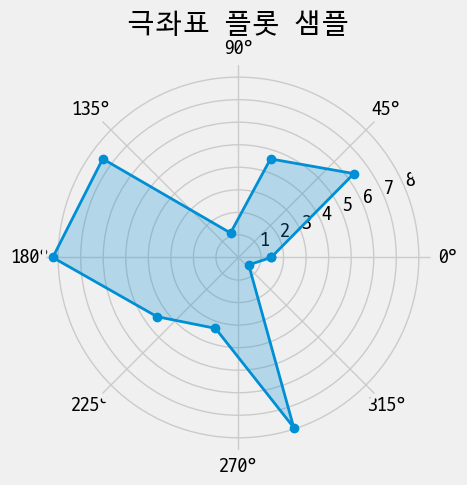

In [76]:
#데이터 생성
angles = np.linspace(0,2*np.pi,10,endpoint=False)
radii = np.random.rand(10)*10
# 첫 번째 값을 마지막에 추가하여 원형 플롯 완성
angles = np.concatenate((angles,[angles[0]]))
radii = np.concatenate((radii,[radii[0]]))
#극좌표 플롯 생성
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(angles, radii, 'o-', linewidth=2)

#배경 채우기
ax.fill(angles, radii, alpha=0.25)
#플롯 제목
ax.set_title('극좌표 플롯 샘플', size=20)
plt.show()

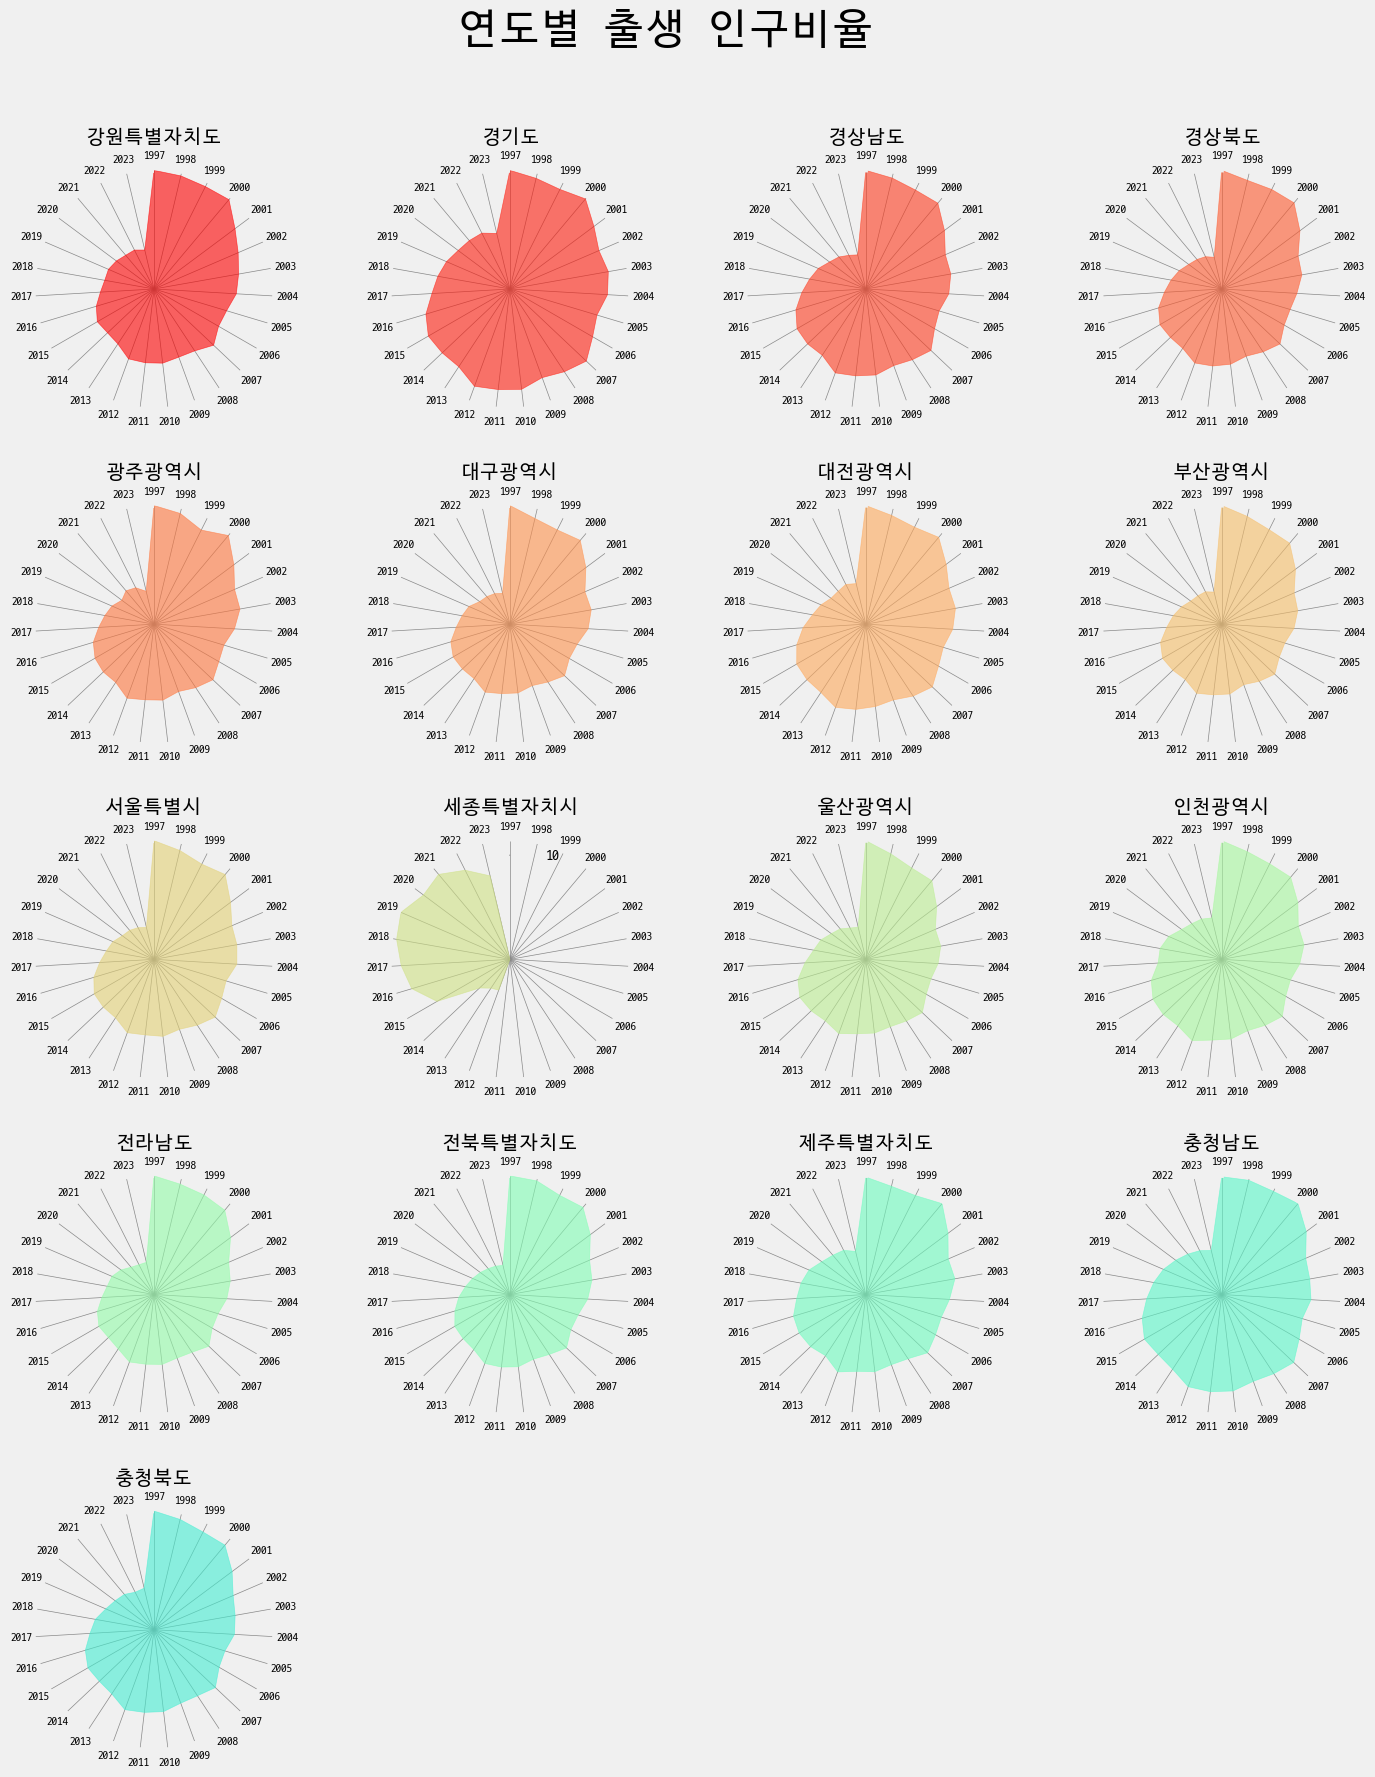

In [103]:
pi = 3.141592
fig, ax = plt.subplots(5, 4, figsize=(15, 20), subplot_kw=dict(polar=True))

# 서브플롯을 1차원 배열 형태로 변환
axs = ax.flat

# 고유한 시간레벨 리스트 생성
year_list = list(ex1_data['year'].unique())

# 지역별로 색상 설정
colors = [plt.cm.rainbow(a) for a in np.linspace(1.0, 0.0, len(year_list))]

# 서브플롯 인덱스 초기화
i = 0

for region, value in ex1_data.groupby('region'):
    # 각 지역의 값 리스트 생성
    arr = list(value['value'])
    ex1_data_plot = arr.copy()
    ex1_data_plot += ex1_data_plot[:1] # 마지막 값을 처음 값으로 넣기
    
    # 각 값에 대한 각도 계산
    angles = [n/float(len(arr)) * 2 * pi for n in range(len(arr))]
    angles += angles[:1] # 값 닫기
    
    # 서브플롯 설정
    axs[i].set_theta_offset(pi/2)  # 0도를 위쪽으로 설정
    axs[i].set_theta_direction(-1)  # 시계 반대 방향으로 각도 증가
    axs[i].set_rlabel_position(20)  # 반지름 레이블 위치 설정
    axs[i].xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # x축 그리드 설정
    axs[i].yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)  # y축 그리드 설정
    axs[i].set_rgrids([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize=10)  # 반지름 그리드 설정
    axs[i].set_xticks(angles[:-1])  # x축 틱 설정
    axs[i].xaxis.set_ticklabels(list(year_list), fontsize=9)  # x축 틱 레이블 설정
    axs[i].set_ylim(0, max(arr))  # y축 범위 설정

    # 선 그리기
    axs[i].plot(angles, ex1_data_plot, linewidth=0, linestyle='solid', zorder=3)
    # 배경 채우기 
    axs[i].fill(angles, ex1_data_plot, color=colors[i], alpha=0.6)

    #서브플롯 제목 설정
    axs[i].set_title(region, fontsize=14, position=(0.5, 1.1))

    i += 1
    
# 남은 공간의 서브플롯 숨기기
for j in range(i, len(axs)):
    fig.delaxes(axs[j])

# 전체 플롯 제목을 설정
fig.suptitle('연도별 출생 인구비율', fontsize=30, y=0.95)
# 서브 플롯 간의 간격 조정
fig.subplots_adjust(wspace=0.5)
plt.savefig('image/연도별출생인구비율.png')
plt.show()